In [2]:
# prepare data 

mod_path = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/figshare/2_estimations/treatments/DA_MCMC_1/estimates/"
obs_path = "/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/figshare/1_datasets_from_SPRUCE/in_treat_2014-2021/"
nsimu    = 1
com_path = "run_mcmc_"
nsimuyr  = 8


# read the data based on plots
ls_warmOnlyPlots = ["P06", "P20", "P13", "P08", "P17"]
ls_warmAndEleCO2 = ["P19", "P11", "P04", "P16", "P10"]
plot_names = ["P04", "P06",  "P08", "P10", "P11", "P13", "P16", "P17", "P19", "P20"]

import pandas as pd
import numpy as np

ls_vars = ["nep", "gpp", "gpp_Tree", "gpp_Shrub", "gpp_Sphagnum", "rh",
           "npp", "npp_Tree", "npp_Shrub", "npp_Sphagnum", 
           "nppLeaf", "nppLeaf_Tree", "nppLeaf_Shrub", "nppLeaf_Sphagnum",
           "nppStem", "nppStem_Tree", "nppStem_Shrub", "nppStem_Sphagnum",
           "nppRoot", "nppRoot_Tree", "nppRoot_Shrub", "nppRoot_Sphagnum",
           "cLeaf",   "cLeaf_Tree",   "cLeaf_Shrub",   "cLeaf_Sphagnum",
           "cStem",   "cStem_Tree",   "cStem_Shrub",   "cStem_Sphagnum",
           "cRoot",   "cRoot_Tree",   "cRoot_Shrub",   "cRoot_Sphagnum",
           "cSoil","ch4", "cLitterFine", "cLitterCwd",
           "ra",      "ra_Tree",      "ra_Shrub",      "ra_Sphagnum",
           "raLeaf",  "raLeaf_Tree",  "raLeaf_Shrub",  "raLeaf_Sphagnum",
           "raStem",  "raStem_Tree",  "raStem_Shrub",  "raStem_Sphagnum",
           "raRoot",  "raRoot_Tree",  "raRoot_Shrub",  "raRoot_Sphagnum",
           "rMaint",  "rMaint_Tree",  "rMaint_Shrub",   "rMaint_Sphagnum",	
           "rGrowth", 'rGrowth_Tree', 'rGrowth_Shrub',  'rGrowth_Sphagnum',
           "raOther", "raOther_Tree", "raOther_Shrub", "raOther_Sphagnum"]

dict_result = {}
for ivar in ls_vars:
    np_dat4plt = np.full((nsimu, nsimuyr, 10), np.nan)
    for ip, iplot in enumerate(plot_names):
        for i in range(nsimu):
            if i<9:    ifile = "00"+str(i+1)
            elif i<99: ifile = "0"+str(i+1)
            else:      ifile = str(i+1)
            dat_file = mod_path+"TECO-SPRUCE_"+com_path+iplot+"_Daily_"+ifile+".csv"
            # dat_file = mod_path+"/"+com_path+iplot+"/results_csv_format/TECO-SPRUCE_"+com_path+iplot+"_Daily.csv"
            # dat_file = mod_path+"/"+com_path+iplot+"/results_csv_format/TECO-SPRUCE_run_mcmc_"+iplot+"_Daily_mid_save_003.csv"
            # if iplot == "P06": dat_file = mod_path+"/"+com_path+iplot+"/results_csv_format/TECO-SPRUCE_run_mcmc_P06-2_Daily_"+ifile+".csv"
            df_mod   = pd.read_csv(dat_file, index_col=None, na_values='NaN').fillna(0)
            # df_mod   = df_mod.fillna(0)
            df_mod.rename(columns={' year':"year"}, inplace=True)
            # GPP: Tree, Shrub, Sphagnum
            result = df_mod.groupby('year')['gpp_Tree'].sum().reset_index()
            result.set_index('year', inplace=True)
            result["gpp_Tree"] = result["gpp_Tree"]*24*0.5 # 0.5 is the weight
            result["gpp_Shrub"] = (df_mod.groupby('year')['gpp_Shrub'].sum().reset_index()["gpp_Shrub"].to_numpy().flatten())*24*0.25 # 0.25 is the weight
            result["gpp_Sphagnum"] = (df_mod.groupby('year')['gpp_Sphagnum'].sum().reset_index()["gpp_Sphagnum"].to_numpy().flatten())*24*0.25
            # NPP: Tree, Shrub, Sphagnum
            result["npp_Tree"]     = (df_mod.groupby('year')['npp_Tree'].sum().reset_index()["npp_Tree"].to_numpy().flatten())*24*0.5
            result["npp_Shrub"]    = (df_mod.groupby('year')['npp_Shrub'].sum().reset_index()["npp_Shrub"].to_numpy().flatten())*24*0.25
            result["npp_Sphagnum"] = (df_mod.groupby('year')['npp_Sphagnum'].sum().reset_index()["npp_Sphagnum"].to_numpy().flatten())*24*0.25
            # NPP parts: NPP_leaf, NPP_stem, NPP_root
            result["nppLeaf_Tree"]     = (df_mod.groupby('year')['nppLeaf_Tree'].sum().reset_index()["nppLeaf_Tree"].to_numpy().flatten())*24*0.5
            result["nppStem_Tree"]     = (df_mod.groupby('year')['nppStem_Tree'].sum().reset_index()["nppStem_Tree"].to_numpy().flatten())*24*0.5
            result["nppRoot_Tree"]     = (df_mod.groupby('year')['nppRoot_Tree'].sum().reset_index()["nppRoot_Tree"].to_numpy().flatten())*24*0.5
            result["nppLeaf_Shrub"]    = (df_mod.groupby('year')['nppLeaf_Shrub'].sum().reset_index()["nppLeaf_Shrub"].to_numpy().flatten())*24*0.25
            result["nppStem_Shrub"]    = (df_mod.groupby('year')['nppStem_Shrub'].sum().reset_index()["nppStem_Shrub"].to_numpy().flatten())*24*0.25
            result["nppRoot_Shrub"]    = (df_mod.groupby('year')['nppRoot_Shrub'].sum().reset_index()["nppRoot_Shrub"].to_numpy().flatten())*24*0.25
            result["nppLeaf_Sphagnum"] = (df_mod.groupby('year')['nppLeaf_Sphagnum'].sum().reset_index()["nppLeaf_Sphagnum"].to_numpy().flatten())*24*0.25
            result["nppStem_Sphagnum"] = (df_mod.groupby('year')['nppStem_Sphagnum'].sum().reset_index()["nppStem_Sphagnum"].to_numpy().flatten())*24*0.25
            result["nppRoot_Sphagnum"] = (df_mod.groupby('year')['nppRoot_Sphagnum'].sum().reset_index()["nppRoot_Sphagnum"].to_numpy().flatten())*24*0.25
            # ERa
            result["ra_Tree"]     = (df_mod.groupby('year')['ra_Tree'].sum().reset_index()["ra_Tree"].to_numpy().flatten())*24*0.5
            result["ra_Shrub"]    = (df_mod.groupby('year')['ra_Shrub'].sum().reset_index()["ra_Shrub"].to_numpy().flatten())*24*0.25
            result["ra_Sphagnum"] = (df_mod.groupby('year')['ra_Sphagnum'].sum().reset_index()["ra_Sphagnum"].to_numpy().flatten())*24*0.25
            # ERa: leaf(leaf+Ncost), stem, root
            result["raLeaf_Tree"]     = (df_mod.groupby('year')['raLeaf_Tree'].sum().reset_index()["raLeaf_Tree"].to_numpy().flatten())*24*0.5
            result["raStem_Tree"]     = (df_mod.groupby('year')['raStem_Tree'].sum().reset_index()["raStem_Tree"].to_numpy().flatten())*24*0.5
            result["raRoot_Tree"]     = (df_mod.groupby('year')['raRoot_Tree'].sum().reset_index()["raRoot_Tree"].to_numpy().flatten())*24*0.5
            result["raLeaf_Shrub"]    = (df_mod.groupby('year')['raLeaf_Shrub'].sum().reset_index()["raLeaf_Shrub"].to_numpy().flatten())*24*0.25
            result["raStem_Shrub"]    = (df_mod.groupby('year')['raStem_Shrub'].sum().reset_index()["raStem_Shrub"].to_numpy().flatten())*24*0.25
            result["raRoot_Shrub"]    = (df_mod.groupby('year')['raRoot_Shrub'].sum().reset_index()["raRoot_Shrub"].to_numpy().flatten())*24*0.25
            result["raLeaf_Sphagnum"] = (df_mod.groupby('year')['raLeaf_Sphagnum'].sum().reset_index()["raLeaf_Sphagnum"].to_numpy().flatten())*24*0.25
            result["raStem_Sphagnum"] = (df_mod.groupby('year')['raStem_Sphagnum'].sum().reset_index()["raStem_Sphagnum"].to_numpy().flatten())*24*0.25
            result["raRoot_Sphagnum"] = (df_mod.groupby('year')['raRoot_Sphagnum'].sum().reset_index()["raRoot_Sphagnum"].to_numpy().flatten())*24*0.25
            result["rMaint_Tree"]     = (df_mod.groupby('year')['rMaint_Tree'].sum().reset_index()["rMaint_Tree"].to_numpy().flatten())*24*0.5
            result["rMaint_Shrub"]     = (df_mod.groupby('year')['rMaint_Shrub'].sum().reset_index()["rMaint_Shrub"].to_numpy().flatten())*24*0.25
            result["rMaint_Sphagnum"]     = (df_mod.groupby('year')['rMaint_Sphagnum'].sum().reset_index()["rMaint_Sphagnum"].to_numpy().flatten())*24*0.25
            result["rGrowth_Tree"]     = (df_mod.groupby('year')['rGrowth_Tree'].sum().reset_index()["rGrowth_Tree"].to_numpy().flatten())*24*0.5
            result["rGrowth_Shrub"]     = (df_mod.groupby('year')['rGrowth_Shrub'].sum().reset_index()["rGrowth_Shrub"].to_numpy().flatten())*24*0.25
            result["rGrowth_Sphagnum"]     = (df_mod.groupby('year')['rGrowth_Sphagnum'].sum().reset_index()["rGrowth_Sphagnum"].to_numpy().flatten())*24*0.25
            result["rMaint"]           = result["rMaint_Tree"] + result["rMaint_Shrub"] + result["rMaint_Sphagnum"]
            result["rGrowth"]          = result["rGrowth_Tree"] + result["rGrowth_Shrub"] + result["rGrowth_Sphagnum"]
            result["raOther_Tree"]    = (df_mod.groupby('year')['raOther_Tree'].sum().reset_index()["raOther_Tree"].to_numpy().flatten())*24*0.5
            result["raOther_Shrub"]    = (df_mod.groupby('year')['raOther_Shrub'].sum().reset_index()["raOther_Shrub"].to_numpy().flatten())*24*0.25
            result["raOther_Sphagnum"]    = (df_mod.groupby('year')['raOther_Sphagnum'].sum().reset_index()["raOther_Sphagnum"].to_numpy().flatten())*24*0.25
            result["raOther"]          = result["raOther_Tree"] + result["raOther_Shrub"] + result["raOther_Sphagnum"]
            # Rh:
            result["rh"] = (df_mod.groupby('year')['rh'].sum().reset_index()["rh"].to_numpy().flatten())*24
            result["ch4"] = (df_mod.groupby('year')['wetlandCH4'].sum().reset_index()["wetlandCH4"].to_numpy().flatten())*24
            # C pools ------------------------------------------------------------------------------------------
            result["cLeaf_Tree"] = (df_mod.groupby('year')['cLeaf_Tree'].mean().reset_index()["cLeaf_Tree"].to_numpy().flatten())*0.5
            result["cStem_Tree"] = (df_mod.groupby('year')['cStem_Tree'].mean().reset_index()["cStem_Tree"].to_numpy().flatten())*0.5
            result["cRoot_Tree"] = (df_mod.groupby('year')['cRoot_Tree'].mean().reset_index()["cRoot_Tree"].to_numpy().flatten())*0.5
            result["cLeaf_Shrub"] = (df_mod.groupby('year')['cLeaf_Shrub'].mean().reset_index()["cLeaf_Shrub"].to_numpy().flatten())*0.25
            result["cStem_Shrub"] = (df_mod.groupby('year')['cStem_Shrub'].mean().reset_index()["cStem_Shrub"].to_numpy().flatten())*0.25
            result["cRoot_Shrub"] = (df_mod.groupby('year')['cRoot_Shrub'].mean().reset_index()["cRoot_Shrub"].to_numpy().flatten())*0.25
            result["cLeaf_Sphagnum"] = (df_mod.groupby('year')['cLeaf_Sphagnum'].mean().reset_index()["cLeaf_Sphagnum"].to_numpy().flatten())*0.25
            result["cStem_Sphagnum"] = (df_mod.groupby('year')['cStem_Sphagnum'].mean().reset_index()["cStem_Sphagnum"].to_numpy().flatten())*0.25
            result["cRoot_Sphagnum"] = (df_mod.groupby('year')['cRoot_Sphagnum'].mean().reset_index()["cRoot_Sphagnum"].to_numpy().flatten())*0.25
            # c Soil
            result["cSoilFast"]      = (df_mod.groupby('year')['cSoilFast'].mean().reset_index()["cSoilFast"].to_numpy().flatten())
            result["cSoilSlow"]      = (df_mod.groupby('year')['cSoilSlow'].mean().reset_index()["cSoilSlow"].to_numpy().flatten())
            result["cSoilPassive"]   = (df_mod.groupby('year')['cSoilPassive'].mean().reset_index()["cSoilPassive"].to_numpy().flatten())
            result["cSoil"]          = result["cSoilFast"] + result["cSoilSlow"] + result["cSoilPassive"]
            # c Litter
            result["cLitterFine"]    = (df_mod.groupby('year')['cLitter'].mean().reset_index()["cLitter"].to_numpy().flatten())
            result["cLitterCwd"]     = (df_mod.groupby('year')['cLitterCwd'].mean().reset_index()["cLitterCwd"].to_numpy().flatten())
            result["cLitter"]        = result["cLitterFine"] + result["cLitterCwd"]
            # LAI
            result["lai_Tree"]      = (df_mod.groupby('year')['lai_Tree'].mean().reset_index()["lai_Tree"].to_numpy().flatten())*0.5
            result["lai_Shrub"]     = (df_mod.groupby('year')['lai_Shrub'].mean().reset_index()["lai_Shrub"].to_numpy().flatten())*0.25
            result["lai_Sphagnum"]  = (df_mod.groupby('year')['lai_Sphagnum'].mean().reset_index()["lai_Sphagnum"].to_numpy().flatten())*0.25
            result["lai"]           = result["lai_Tree"] + result["lai_Shrub"] + result["lai_Sphagnum"]
            # ----------------------------------------------------------------------------------------------------
            print(iplot, i)#, result["ch4"])
            result["nep"]     = result["npp_Tree"]     + result["npp_Shrub"]     + result["npp_Sphagnum"]     - result['rh'] - result['ch4']
            result["gpp"]     = result["gpp_Tree"]     + result["gpp_Shrub"]     + result["gpp_Sphagnum"]
            result["npp"]     = result["npp_Tree"]     + result["npp_Shrub"]     + result["npp_Sphagnum"]
            result["nppLeaf"] = result["nppLeaf_Tree"] + result["nppLeaf_Shrub"] + result["nppLeaf_Sphagnum"]
            result["nppStem"] = result["nppStem_Tree"] + result["nppStem_Shrub"] + result["nppStem_Sphagnum"]
            result["nppRoot"] = result["nppRoot_Tree"] + result["nppRoot_Shrub"] + result["nppRoot_Sphagnum"]
            result["ra"]      = result["ra_Tree"]      + result["ra_Shrub"]      + result["ra_Sphagnum"]
            result["raLeaf"]  = result["raLeaf_Tree"]  + result["raLeaf_Shrub"]  + result["raLeaf_Sphagnum"]
            result["raStem"]  = result["raStem_Tree"]  + result["raStem_Shrub"]  + result["raStem_Sphagnum"]
            result["raRoot"]  = result["raRoot_Tree"]  + result["raRoot_Shrub"]  + result["raRoot_Sphagnum"]
            result["cLeaf"]   = result["cLeaf_Tree"]   + result["cLeaf_Shrub"]   + result["cLeaf_Sphagnum"]
            result["cStem"]   = result["cStem_Tree"]   + result["cStem_Shrub"]   + result["cStem_Sphagnum"]
            result["cRoot"]   = result["cRoot_Tree"]   + result["cRoot_Shrub"]   + result["cRoot_Sphagnum"]
            # print(iplot, ivar,result[ivar].to_numpy().flatten())
            np_dat4plt[i, :, ip] = result[ivar].to_numpy().flatten()
    dict_result[ivar] = np_dat4plt
print(dict_result)
import pickle

# 保存字典数据到文件
# with open('3_5_datasources_carbonbudget_m_8_16_17_19_new/sourcedata_v0125.pkl', 'wb') as file:
# with open('3_7_datasources_240224/sourcedata_v0125.pkl', 'wb') as file:
with open('/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/test_output/3_mod_without_acc/sourcedata.pkl', 'wb') as file:
    pickle.dump(dict_result, file)

P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 0
P17 0
P19 0
P20 0
P04 0
P06 0
P08 0
P10 0
P11 0
P13 0
P16 

[328.5846 314.0009 322.1744   9.8779  45.2135]


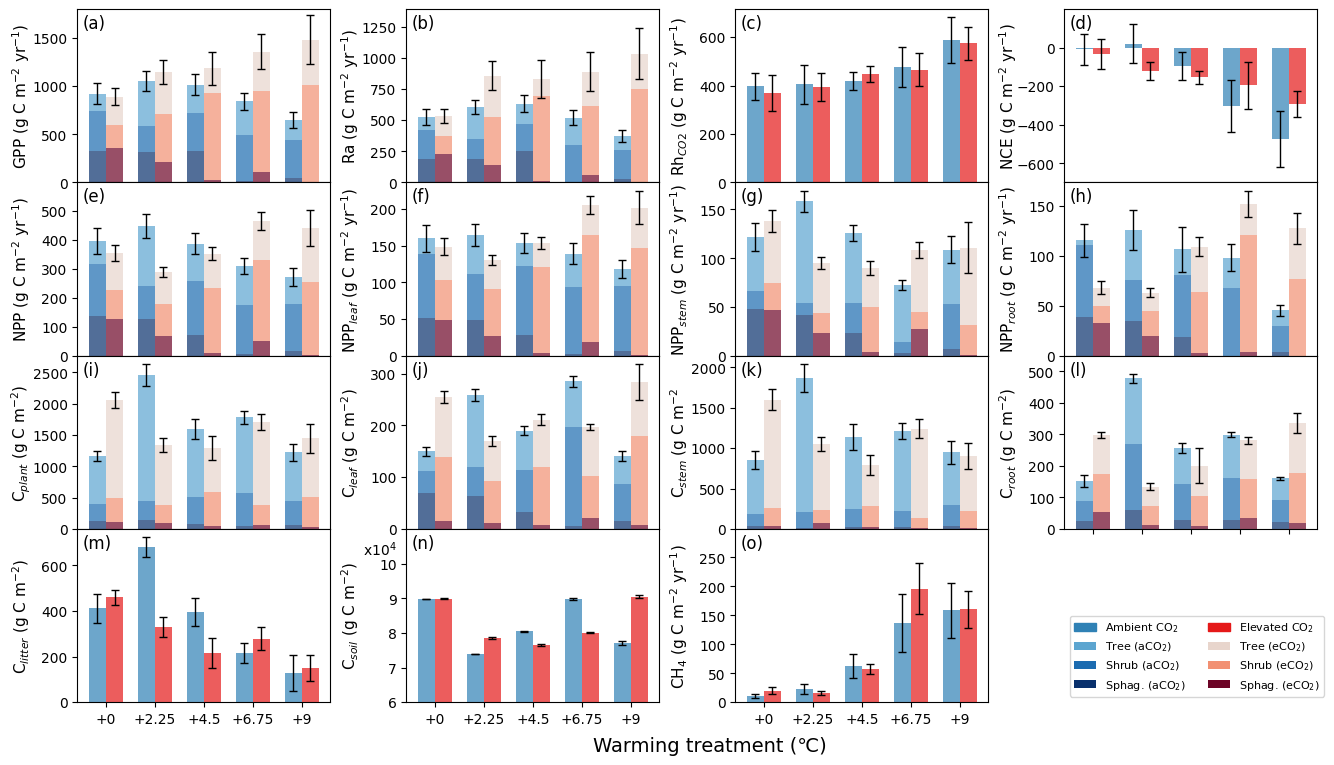

In [4]:


import pickle
import numpy  as np
import pandas as pd

with open('/Users/jianzhou/MyDocs/1_works/1_proj_SPRUCE/1_SPRUCE_DA/4_summary_data_code_paper/test_output/2_mod_results/sourcedata.pkl', 'rb') as file:
    dict_result = pickle.load(file)

# 1. data of NEP
dat_NEP      = dict_result['nep'] + dict_result['ch4']  # isimu, itime, iplot (5, 7, 10)
dat_NEP_mean = np.mean(dat_NEP, axis=0) # itime, iplot (7, 10)
dat_NCE      = dict_result['nep']

# 2. data of GPP
dat_GPP       = dict_result['gpp']
dat_GPP_tree  = dict_result['gpp_Tree']
dat_GPP_shrub = dict_result['gpp_Shrub']
dat_GPP_sphag = dict_result['gpp_Sphagnum']
dict_gpp      = {"all": dat_GPP, "tree": dat_GPP_tree, "shrub": dat_GPP_shrub, "sphag": dat_GPP_sphag}

# print(dict_gpp)

# 3. data of Rh
dat_Rh       = dict_result["rh"]

# 4. data of NPP
dat_NPP       = dict_result["npp"]
dat_NPP_tree  = dict_result["npp_Tree"]
dat_NPP_shrub = dict_result["npp_Shrub"]
dat_NPP_sphag = dict_result["npp_Sphagnum"]
dict_npp      = {"all": dat_NPP, "tree": dat_NPP_tree, "shrub": dat_NPP_shrub, "sphag": dat_NPP_sphag} 


# 5. data of NPP_leaf
dat_NPPLeaf       = dict_result["nppLeaf"]
dat_NPPLeaf_tree  = dict_result["nppLeaf_Tree"]
dat_NPPLeaf_shrub = dict_result["nppLeaf_Shrub"]
dat_NPPLeaf_sphag = dict_result["nppLeaf_Sphagnum"]
dict_nppleaf      = {"all": dat_NPPLeaf, "tree": dat_NPPLeaf_tree, "shrub": dat_NPPLeaf_shrub, "sphag": dat_NPPLeaf_sphag }

# 6. data of NPP_stem
dat_NPPStem       = dict_result["nppStem"]
dat_NPPStem_tree  = dict_result["nppStem_Tree"]
dat_NPPStem_shrub = dict_result["nppStem_Shrub"]
dat_NPPStem_sphag = dict_result["nppStem_Sphagnum"]
dict_nppstem      = {"all": dat_NPPStem, "tree": dat_NPPStem_tree, "shrub": dat_NPPStem_shrub, "sphag": dat_NPPStem_sphag}

# 7. data of NPP_root
dat_NPPRoot       = dict_result["nppRoot"]
dat_NPPRoot_tree  = dict_result["nppRoot_Tree"]
dat_NPPRoot_shrub = dict_result["nppRoot_Shrub"]
dat_NPPRoot_sphag = dict_result["nppRoot_Sphagnum"] 
dict_npproot      = {"all": dat_NPPRoot, "tree": dat_NPPRoot_tree, "shrub": dat_NPPRoot_shrub, "sphag": dat_NPPRoot_sphag}

# 8. data of Ra
dat_Ra            = dict_result["ra"]
dat_Ra_tree       = dict_result["ra_Tree"]
dat_Ra_shrub      = dict_result["ra_Shrub"]
dat_Ra_sphag      = dict_result["ra_Sphagnum"]
dict_ra           = {"all": dat_Ra, "tree": dat_Ra_tree, "shrub": dat_Ra_shrub, "sphag": dat_Ra_sphag}

# 9. data of RaLeaf
dat_RaLeaf        = dict_result["raLeaf"]
dat_RaLeaf_tree   = dict_result["raLeaf_Tree"]
dat_RaLeaf_shrub  = dict_result["raLeaf_Shrub"]
dat_RaLeaf_sphag  = dict_result["raLeaf_Sphagnum"]
dict_raleaf       = {"all": dat_RaLeaf, "tree": dat_RaLeaf_tree, "shrub": dat_RaLeaf_shrub, "sphag": dat_RaLeaf_sphag}

# 10. data of RaStem
dat_RaStem        = dict_result["raStem"]
dat_RaStem_tree   = dict_result["raStem_Tree"]
dat_RaStem_shrub  = dict_result["raStem_Shrub"]
dat_RaStem_sphag  = dict_result["raStem_Sphagnum"]
dict_rastem       = {"all": dat_RaStem, "tree": dat_RaStem_tree, "shrub": dat_RaStem_shrub, "sphag": dat_RaStem_sphag}

# 11. data of RaRoot
dat_RaRoot        = dict_result["raRoot"]
dat_RaRoot_tree   = dict_result["raRoot_Tree"]
dat_RaRoot_shrub  = dict_result["raRoot_Shrub"]
dat_RaRoot_sphag  = dict_result["raRoot_Sphagnum"]
dict_raroot       = {"all": dat_RaRoot, "tree": dat_RaRoot_tree, "shrub": dat_RaRoot_shrub, "sphag": dat_RaRoot_sphag}

# 12. data of cSoil
dat_cSoil        = dict_result["cSoil"]

# 13. data of cLeaf
dat_cLeaf        = dict_result["cLeaf"]
dat_cLeaf_tree   = dict_result["cLeaf_Tree"]
dat_cLeaf_shrub  = dict_result["cLeaf_Shrub"]
dat_cLeaf_sphag  = dict_result["cLeaf_Sphagnum"]
dict_cleaf       = {"all": dat_cLeaf, "tree": dat_cLeaf_tree, "shrub": dat_cLeaf_shrub, "sphag": dat_cLeaf_sphag}

# 14. data of cStem
dat_cStem        = dict_result["cStem"]
dat_cStem_tree   = dict_result["cStem_Tree"]
dat_cStem_shrub  = dict_result["cStem_Shrub"]
dat_cStem_sphag  = dict_result["cStem_Sphagnum"]
dict_cstem       = {"all": dat_cStem, "tree": dat_cStem_tree, "shrub": dat_cStem_shrub, "sphag": dat_cStem_sphag}

# 15. data of cRoot
dat_cRoot        = dict_result["cRoot"]
dat_cRoot_tree   = dict_result["cRoot_Tree"]
dat_cRoot_shrub  = dict_result["cRoot_Shrub"]
dat_cRoot_sphag  = dict_result["cRoot_Sphagnum"]
dict_croot       = {"all": dat_cRoot, "tree": dat_cRoot_tree, "shrub": dat_cRoot_tree, "sphag": dat_cRoot_sphag}

# 16. ch4
dat_ch4 = dict_result["ch4"]

# 17. cplant
dat_cPlant       = dict_result["cLeaf"]          + dict_result["cStem"]          + dict_result["cRoot"]
dat_cPlant_tree  = dict_result["cLeaf_Tree"]     + dict_result["cStem_Tree"]     + dict_result["cRoot_Tree"]
dat_cPlant_shrub = dict_result["cLeaf_Shrub"]    + dict_result["cStem_Shrub"]    + dict_result["cRoot_Shrub"]
dat_cPlant_sphag = dict_result["cLeaf_Sphagnum"] + dict_result["cStem_Sphagnum"] + dict_result["cRoot_Sphagnum"]
dict_cplant      = {"all": dat_cPlant, "tree": dat_cPlant_tree, "shrub": dat_cPlant_shrub, "sphag": dat_cPlant_sphag}

# 18. cLitter
dat_cLitter      = dict_result["cLitterFine"] + dict_result["cLitterCwd"]

import matplotlib.pyplot as plt

# plot 4x4 figure
# GPP; ra; rh; NEP
# NPP; NPPleaf; NPPstem; NPProot;
# cPlant; cleaf; cstem; croot;
# clitter; csoil; ch4; nce
# print(dat_cPlant)

ls_warmOnlyPlots = ["P06", "P20", "P13", "P08", "P17"]
ls_warmAndEleCO2 = ["P19", "P11", "P04", "P16", "P10"]
plot_names   = ["P04", "P06",  "P08", "P10", "P11", "P13", "P16", "P17", "P19", "P20"]
i_warmPlots  = [1, 9, 5, 2, 7]
i_warmEleCO2 = [8, 4, 0, 6, 3]

ls_varnames = [["gpp",    "ra",      "rh",      "nce"], 
               ["npp",    "nppLeaf", "nppStem", "nppRoot"], 
               ["cPlant", "cLeaf",   "cStem",   "cRoot"], 
               ["cLitter", "cSoil",   "ch4",    "nce" ]]

dict_dat4plt = {"gpp": dict_gpp, "ra": dict_ra, "rh": dat_Rh, "nep": dat_NEP,
                "npp": dict_npp, "nppLeaf": dict_nppleaf, "nppStem": dict_nppstem, "nppRoot": dict_npproot, 
                "cPlant": dict_cplant, "cLeaf": dict_cleaf, "cStem": dict_cstem, "cRoot": dict_croot,
                "cLitter": dat_cLitter, "cSoil": dat_cSoil, "ch4": dat_ch4, "nce": dat_NCE}

ls_varspec   = ["gpp", "ra", "npp", "nppLeaf", "nppStem", "nppRoot", "cPlant", "cLeaf", "cStem", "cRoot"]

ls_units   = [["(a)", "(b)", "(c)", "(d)"],
              ["(e)", "(f)", "(g)", "(h)"],
              ["(i)", "(j)", "(k)", "(l)"],
              ["(m)", "(n)", "(o)", "(p)"]]

ls_labels   = [["GPP (g C m$^{-2}$ yr$^{-1}$)", "Ra (g C m$^{-2}$ yr$^{-1}$)",           "Rh$_{CO2}$ (g C m$^{-2}$ yr$^{-1}$)",   "NCE (g C m$^{-2}$ yr$^{-1}$)"     ], # "NEP (g C m$^{-2}$ yr$^{-1}$)"
              ["NPP (g C m$^{-2}$ yr$^{-1}$)",  "NPP$_{leaf}$ (g C m$^{-2}$ yr$^{-1}$)", "NPP$_{stem}$ (g C m$^{-2}$ yr$^{-1}$)", "NPP$_{root}$ (g C m$^{-2}$ yr$^{-1}$)"],
              ["C$_{plant}$ (g C m$^{-2}$)",    "C$_{leaf}$ (g C m$^{-2}$)",             "C$_{stem}$ (g C m$^{-2}$",              "C$_{root}$ (g C m$^{-2}$)"],
              ["C$_{litter}$ (g C m$^{-2}$)",   "C$_{soil}$ (g C m$^{-2}$)",             "CH$_4$ (g C m$^{-2}$ yr$^{-1}$)",       "NCE (g C m$^{-2}$ yr$^{-1}$)"]]

def return_mean_std(np_data):
    mean_val_nsimu = np.mean(np_data, axis=0)
    std_val_nsimu  = np.std(np_data, axis=0)
    df_group   = pd.DataFrame(mean_val_nsimu.T, columns=[2017, 2018, 2019, 2020, 2021])
    # ---------------------------------
    #  yearly mean and std
    mean_val_yr = np.mean(mean_val_nsimu, axis=0)
    std_val_yr  = np.std(mean_val_nsimu,  axis=0)
    return df_group, mean_val_yr


# start to plot
fig, axes = plt.subplots(4, 4, figsize=(16, 9), sharex='col')
# 画错开柱状图
categories = ["+0.00", "+2.25", "+4.50", "+6.75", "+9.00"]
bar_width = 0.35  # 设置柱状图的宽度
bar_positions_group1 = np.arange(len(categories)) - bar_width/2
bar_positions_group2 = bar_positions_group1 + bar_width

colors_spc_aco2 = {"sphag": "#08306C", "shrub": "#1B6BB0", "tree": "#5CA5D0"}
colors_spc_eco2 = {"sphag": "#6C0426", "shrub": "#F29072", "tree": "#E8D5CC"}

for iax in range(4):
    for jax in range(4):
        ax = axes[iax, jax]
        if iax == 3 and jax == 3:  ax.axis("off"); continue; 
        ax.text(0.02, 0.89, ls_units[iax][jax],transform=ax.transAxes, fontsize=12)
        # ax.set_ylabel(ls_labels[iax][jax])
        ax.text(-0.22, 0.5, ls_labels[iax][jax], ha='center', va='center',rotation='vertical',transform=ax.transAxes, fontsize=11)
        var4plt = ls_varnames[iax][jax]
        dat4plt = dict_dat4plt[var4plt]
        # check whether need 
        if var4plt in ls_varspec:
            vals_bottom1 = np.zeros(len(categories))
            vals_bottom2 = np.zeros(len(categories))
            for ispc in ["sphag", "shrub", "tree", "all"]:
                np_dat4plt = dat4plt[ispc]
                data_group1 = np_dat4plt[:,2:,i_warmPlots]
                data_group2 = np_dat4plt[:,2:,i_warmEleCO2]
                # calculate the mean and std based on multi-simulations
                mean_group1 = np.mean(data_group1, axis=0)
                mean_group2 = np.mean(data_group2, axis=0)
                # std_group1  = np.std(data_group1,  axis=0)
                # std_group2  = np.std(data_group2,  axis=0)

                # calculate all mean and std based on multi-years
                all_mean_group1 = np.mean(mean_group1, axis=0)
                all_mean_group2 = np.mean(mean_group2, axis=0)
                all_std_group1  = np.std(mean_group1,  axis=0)
                all_std_group2  = np.std(mean_group2,  axis=0)

                if var4plt == "gpp" and ispc == "sphag":
                    print(all_mean_group1)

                data_combined = np.vstack([all_mean_group1, all_mean_group2]).T
                df_mean = pd.DataFrame(data_combined, columns=['aCO2', 'eCO2'], index=categories)

                data_combined = np.vstack([all_std_group1, all_std_group2]).T
                df_std  = pd.DataFrame(data_combined, columns=['aCO2', 'eCO2'], index=categories)
                
                if ispc == "all":
                    ax.errorbar(bar_positions_group1 , vals_bottom1, yerr=df_std['aCO2'], fmt='none', ecolor='black',  elinewidth=1,capsize=3, capthick=1)
                    ax.errorbar(bar_positions_group2 , vals_bottom2, yerr=df_std['eCO2'], fmt='none', ecolor='black',  elinewidth=1,capsize=3, capthick=1)
                else:
                    ax.bar(bar_positions_group1, df_mean['aCO2'], bottom=vals_bottom1, color=colors_spc_aco2[ispc], width=bar_width, alpha=0.7, label='Ambient CO$_2$')
                    ax.bar(bar_positions_group2, df_mean['eCO2'], bottom=vals_bottom2, color=colors_spc_eco2[ispc], width=bar_width, alpha=0.7, label='Elevated CO$_2$')
                    vals_bottom1 = vals_bottom1 + df_mean['aCO2']
                    vals_bottom2 = vals_bottom2 + df_mean['eCO2']
        else:
            np_dat4plt  = dat4plt
            data_group1 = np_dat4plt[:,2:,i_warmPlots]
            data_group2 = np_dat4plt[:,2:,i_warmEleCO2]
            # calculate the mean and std based on multi-simulations
            mean_group1 = np.mean(data_group1, axis=0)
            mean_group2 = np.mean(data_group2, axis=0)
            # std_group1  = np.std(data_group1,  axis=0)
            # std_group2  = np.std(data_group2,  axis=0)

            # calculate all mean and std based on multi-years
            all_mean_group1 = np.mean(mean_group1, axis=0)
            all_mean_group2 = np.mean(mean_group2, axis=0)
            all_std_group1  = np.std(mean_group1,  axis=0)
            all_std_group2  = np.std(mean_group2,  axis=0)

            data_combined = np.vstack([all_mean_group1, all_mean_group2]).T
            df_mean = pd.DataFrame(data_combined, columns=['aCO2', 'eCO2'], index=categories)

            data_combined = np.vstack([all_std_group1, all_std_group2]).T
            df_std  = pd.DataFrame(data_combined, columns=['aCO2', 'eCO2'], index=categories)
            
            ax.bar(bar_positions_group1, df_mean['aCO2'], color="#2F81B5",   width=bar_width, alpha=0.7, label='Ambient CO$_2$')
            ax.bar(bar_positions_group2, df_mean['eCO2'], color='#E51818', width=bar_width, alpha=0.7, label='Elevated CO$_2$')
            ax.errorbar(bar_positions_group1, df_mean['aCO2'], yerr=df_std['aCO2'], fmt='none', ecolor='black',  elinewidth=1,capsize=3, capthick=1)
            ax.errorbar(bar_positions_group2, df_mean['eCO2'], yerr=df_std['eCO2'], fmt='none', ecolor='black',  elinewidth=1,capsize=3, capthick=1)

custom_x_ticks = [0, 1, 2, 3, 4]  
custom_x_labels = ['+0', '+2.25', '+4.5', '+6.75', '+9']
for i in range(4):  
    axes[3, i].set_xticks(custom_x_ticks, custom_x_labels, fontsize=10)
axes[3,1].set_ylim(60000, 110000)
axes[3,1].set_yticks([60000,70000,80000, 90000, 100000], [6, 7, 8, 9, 10])
axes[3,1].text(-0.17, 0.94, "x10$^4$", ha= "left", va="top",transform=axes[3,1].transAxes) #, fontsize=12)
axes[3,3].set_ylim(-999, 399)

axes[3,2].text(-0.1, -0.25, "Warming treatment (℃)", fontsize=14, ha='center', va='center', transform=axes[3,2].transAxes)

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
# 创建图例句柄
blue_line = mpatches.Rectangle((0, 0), 1, 1,  color='#2F81B5', linestyle = "-", label='Ambient CO$_2$')
green_line = mpatches.Rectangle((0, 0), 1, 1,  color='#E51818', linestyle = "-", label='Elevated CO$_2$')

# 添加图例
# axes[3,3].legend(bbox_to_anchor=(0.01, 0.01), loc='lower left', handles=[blue_line, green_line], fontsize=6)

# import matplotlib.patches as mpatches
# # 创建图例句柄
# aCO2 = mpatches.Patch([], [], color="white", linestyle = "-", label='aCO$_2$')
# aCO2_sphag = mpatches.Patch([], [], color=colors_spc_aco2["sphag"], linestyle = "-", label='Sphag.')
# aCO2_shrub = mpatches.Patch([], [], color=colors_spc_aco2["shrub"], linestyle = "-", label='Shrub')
# aCO2_tree  = mpatches.Patch([], [], color=colors_spc_aco2["tree"], linestyle = "-", label='Tree')

# eCO2 = mpatches.Patch([], [], color="white", linestyle = "-", label='eCO$_2$')
# eCO2_sphag = mpatches.Patch([], [], color=colors_spc_eco2["sphag"], linestyle = "-", label='Sphag.')
# eCO2_shrub = mpatches.Patch([], [], color=colors_spc_eco2["shrub"], linestyle = "-", label='Shrub')
# eCO2_tree  = mpatches.Patch([], [], color=colors_spc_eco2["tree"], linestyle = "-", label='Tree')

# # 添加图例
# axes[3,2].legend(bbox_to_anchor=(0.01, 0.85), loc='upper left', handles=[aCO2,aCO2_tree, aCO2_shrub, aCO2_sphag, eCO2, eCO2_tree,  eCO2_shrub,  eCO2_sphag], 
#                  handlelength=1, handletextpad=0.5, columnspacing=0.5, ncol=2, fontsize=9)#, labelspacing=0.1)


axes[0, 0].set_ylim((0, 1800))
axes[0, 1].set_ylim((0, 1390))
axes[2, 3].set_ylim((0, 550))
axes[1, 0].set_ylim(0, 599)
axes[3, 2].set_ylim(0, 299)
axes[0, 3].set_ylim(-699, 199)

colors_spc_aco2 = {"sphag": "#08306C", "shrub": "#1B6BB0", "tree": "#5CA5D0"}
colors_spc_eco2 = {"sphag": "#6C0426", "shrub": "#F29072", "tree": "#E8D5CC"}

import matplotlib.patches as mpatches
# 创建图例句柄
sphag_aco2 = mpatches.Rectangle((0, 0), 1, 1, facecolor='#08306C',  label='Sphag. (aCO$_2$)')
sphag_eco2 = mpatches.Rectangle((0, 0), 1, 1, facecolor='#6C0426',  label='Sphag. (eCO$_2$)')

shrub_aco2 = mpatches.Rectangle((0, 0), 1, 1, facecolor='#1B6BB0',  label='Shrub (aCO$_2$)')
shrub_eco2 = mpatches.Rectangle((0, 0), 1, 1, facecolor='#F29072',  label='Shrub (eCO$_2$)')

tree_aco2 = mpatches.Rectangle((0, 0), 1, 1, facecolor='#5CA5D0',  label='Tree (aCO$_2$)')
tree_eco2 = mpatches.Rectangle((0, 0), 1, 1, facecolor='#E8D5CC', label='Tree (eCO$_2$)')

# 添加图例
# axes[3,3].legend(loc='lower left', handles=[sphag_aco2,  shrub_aco2, tree_aco2,sphag_eco2, shrub_eco2,  tree_eco2, blue_line, green_line], ncol=2, fontsize=8)
axes[3,3].legend(loc='lower left', handles=[blue_line, tree_aco2, shrub_aco2, sphag_aco2, green_line,  tree_eco2, shrub_eco2, sphag_eco2], ncol=2, fontsize=8)

# # 添加图例
# # plt.legend(fontsize = 10)


# # plt.gcf().set_facecolor('none')
# fig.align_ylabels()
# plt.tight_layout()
# axes[0, 0].legend(loc='lower left', bbox_to_anchor=(1.5, 0.5))
# # plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
# # fig.patch.set_facecolor('white')
# # fig.savefig('1_result_vals_1.png', dpi=1000)#, transparent=True, bbox_inches='tight')
plt.subplots_adjust(hspace=0, wspace=0.3)
plt.show()